## Importações

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
sns.set()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Funções de benchmark:

$$
f_1(x) = \sum_{i=1}^{n} \; x_{i}^{2} \qquad (1) \\
f_2(x) = \sum_{i=1}^{n} \; |x_{i}| + \prod_{i=1}^{n} \; |x_{i}| \qquad (2)
$$

## F1

In [3]:
def f1(cromossomo):
    
    elevado = cromossomo ** 2
    custo = np.sum(elevado)
    
    return custo

## F2

In [4]:
def f2(cromossomo):
    
    absoluto = np.absolute(cromossomo)
    
    somatorio = np.sum(absoluto)
    probatorio = np.prod(absoluto)
    
    return somatorio + probatorio

# Gerando população:

In [5]:
def gerarPopulacao(limInf, limSup, qtdade, n):
    
    return np.random.uniform(limInf, limSup, (qtdade, n))

# Torneio

In [6]:
def torneio(populacao, f1):
    
    # calcula o fitness de toda a população
    vetorCusto = np.apply_along_axis(func1d=f1, 
                                     axis=1, 
                                     arr=populacao)
    
    # checamos o tamanho da população
    intervalo = populacao.shape[0]
    
    selecionados = np.array([])
    
    # selecionamos metade da população
    for i in range(int(intervalo/2)):
        
        # escolhe dois indivíduos para duelar
        escolhidos = np.random.choice(intervalo, 2, replace=False)
        
        # ficamos com o de menor fitness
        menor = vetorCusto[escolhidos].min()
        
        # encontramos esse indivíduo da população e o selecionamos
        indices = np.where(vetorCusto == menor)[0].astype(np.int64)
        
        # vamos criando nosso conjunto de selecionados
        selecionados = np.append(selecionados, indices).astype(np.int64)
    
    # retorna a população selecionada (metade dela)
    return populacao[selecionados, :]

# Crossover Flat

In [7]:
def crossoverFlat(A, B):
    
    # pegamos a quantidade de genes
    dim = A.shape[0]
    filhos = list()

    # geramos os genes do filhos
    for i in range(dim):
        
        # 4 genes são gerado tendo como limite sup e inf seus pais
        genesFilhos = np.random.uniform(A[i], B[i], (4,))
        filhos.append(genesFilhos)

    # assim, com 2 pais, geramos 4 filhos
    return np.array(filhos).T

In [8]:
def recombinar(selecionados):
    
    quantidade = selecionados.shape[0]
    filhos = list()
    i = 0
    
    # pegamos os selecionados, de 2 em 2 de maneira incremental
    while i < quantidade:
        paiA = selecionados[i, :]
        i += 1
        paiB = selecionados[i, :]
        i += 1 
        
        # 4 filhos são gerados
        novosFilhos = crossoverFlat(paiA, paiB)
        
        for filho in novosFilhos:
            filhos.append(filho)
        
    # aqui só sobram os filhos gerados pelo crossover flat
    return np.array(filhos)

# Mutação

In [9]:
def mutarPopulacao(populacao, fator, limite, limInf, limSup):
    
    linhas, colunas = populacao.shape
    
    # gernado uma matriz de genes que serão mutados
    mutados = np.random.randint(101, size=(linhas, colunas)) >= limite
    
    qtdade = mutados.sum()
    
    # aumentamos ou diminuimos os limites superiores para a mutação
    inf = populacao[mutados]*(1 - fator)
    sup = populacao[mutados]*(1 + fator)
    
    # gerantimos que os genes estará na região factível
    np.putmask(inf, inf < limInf, limInf)
    np.putmask(inf, inf > limSup, limSup)
    np.putmask(sup, sup > limSup, limSup)
    np.putmask(sup, sup < limInf, limInf)
    
    # apenas os genes sorteados serão mutados
    populacao[mutados] = np.random.uniform(low=inf, high=sup, size=(qtdade,))

# Ciclo

In [10]:
def algoritmoGenetico(funcao, fator, limite, limInf, limSup, qtdade, n):
    
    
    start_time = time.time()
    
    # gerando a população inicial
    populacao = gerarPopulacao(limInf, limSup, qtdade, n)
    
    # calculando o fitness
    valores   = np.apply_along_axis(func1d=funcao, 
                                    axis=1, 
                                    arr=populacao)
    
    count     = 0
    
    # checa se o melhor indivíduo está próximo da solução
    while valores.min() > 1e-30:
        
        # seleciona os indivíduos
        selecionados = torneio(populacao, funcao)
        
        # é feita a recombinação
        recombinados = recombinar(selecionados)
        
        # são mutados os indivíduos 
        mutarPopulacao(recombinados, fator, limite, limInf, limSup)
        
        # a população é substituída
        populacao    = recombinados
        
        # o fitness é recalculado
        valores      = np.apply_along_axis(func1d=funcao, 
                                           axis=1, 
                                           arr=populacao)
        count += 1
        
        #print(valores.min())

    elapsed_time = time.time() - start_time
        
    return count, elapsed_time

In [13]:
%time algoritmoGenetico(funcao=f1, fator=1, limite=0, limInf=-100, limSup=100, qtdade=8, n=30)

CPU times: user 207 ms, sys: 0 ns, total: 207 ms
Wall time: 208 ms


(235, 0.20786499977111816)

# Análise dos Resultados
## Gerando Dados

In [58]:
def analise(func, Inf, Sup):
    interacoes1 = list()
    interacoes2 = list()
    interacoes3 = list()
    interacoes4 = list()

    for i in range(30):
        valor1 = algoritmoGenetico(funcao=func, fator=0.5, limite=80, limInf=Inf, limSup=Sup, qtdade=8, n=30)
        valor2 = algoritmoGenetico(funcao=func, fator=0.7, limite=50, limInf=Inf, limSup=Sup, qtdade=8, n=30)
        valor3 = algoritmoGenetico(funcao=func, fator=0.9, limite=20, limInf=Inf, limSup=Sup, qtdade=8, n=30)
        valor4 = algoritmoGenetico(funcao=func, fator=1, limite=0, limInf=Inf, limSup=Sup, qtdade=8, n=30)

        interacoes1.append(valor1)
        interacoes2.append(valor2)
        interacoes3.append(valor3)
        interacoes4.append(valor4)

    quantidade1, tempo1 = zip(*interacoes1)
    quantidade2, tempo2 = zip(*interacoes2)
    quantidade3, tempo3 = zip(*interacoes3)
    quantidade4, tempo4 = zip(*interacoes4)

    tempo = [round(np.mean(tempo1)*1000, 3), round(np.mean(tempo2)*1000, 3), 
             round(np.mean(tempo3)*1000, 3), round(np.mean(tempo4)*1000, 3)]
    
    interacoes = [round(np.mean(quantidade1), 3), round(np.mean(quantidade2), 3), 
                  round(np.mean(quantidade3), 3), round(np.mean(quantidade4), 3)]
    
    desvioTempo = [round(np.std(tempo1)*1000, 3), round(np.std(tempo2)*1000, 3), 
                   round(np.std(tempo3)*1000, 3), round(np.std(tempo4)*1000, 3)]
    
    desvioInteracoes = [round(np.std(quantidade1), 3), round(np.std(quantidade2), 3), 
                        round(np.std(quantidade3), 3), round(np.std(quantidade4), 3)]
    
    return tempo, interacoes, desvioTempo, desvioInteracoes

## Gráfico

In [59]:
def gerar_grafico(tempo, interacoes, figura):
    
    for i in range(4):
        
        # gerando linhas verticais
        plt.vlines(tempo[i], 0, interacoes[i])
        # gernado pontos em cima das linhas
        plt.plot(tempo[i], interacoes[i], "o")
        # tempos um lollipop graph
    
    # limitando o eixo y
    plt.ylim([0, interacoes[0]+200])
    # ticando o eixo x com valores em análise
    plt.xticks(tempo, rotation=45)
    # ticando o eixo y com valores em análise
    plt.yticks(interacoes)

    # rotulando eixos, legenda e título
    plt.xlabel('Tempo (milissegundos)')
    plt.ylabel('Interações')
    plt.legend(['$H_1$', '$H_2$', '$H_3$', '$H_4$'])
    plt.title('$f_%d$ com 8 indivíduos' % figura, fontsize=20)

    # salvando e mostrando o gáfico
    plt.savefig('f%d.svg' % figura, bbox_inches='tight')
    plt.show()

In [60]:
tempoF1, interacoesF1, desvioTF1, desvioIF1 = analise(f1, -100, 100)
tempoF2, interacoesF2, desvioTF2, desvioIF2 = analise(f2, -10, 10)

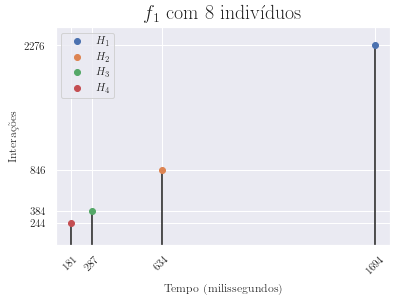

In [61]:
gerar_grafico(tempoF1, interacoesF1, 1)

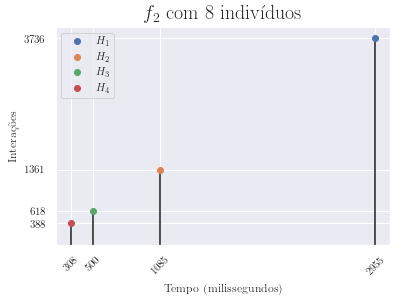

In [62]:
gerar_grafico(tempoF2, interacoesF2, 2)

## Tabelas

In [71]:
def gerar_tabela(colUm, dado, colDois, desvio, nome):
    tabela = pd.DataFrame({colUm : dado, 
                           colDois: desvio}, 
                          index=['$H_1$', '$H_2$', '$H_3$', '$H_4$'])
    tabela.index.name = 'Hyperparameter'

    with open('%s.tex' % nome,'w') as tb:
        tb.write(tabela.to_latex())

    return tabela

In [72]:
gerar_tabela('Tempo (ms)', tempoF1, 'Desvio (ms)', desvioTF1, 'TabelaF1Tempo')

,Tempo (ms),Desvio (ms)
Hyperparameter,,
$H_1$,1693.957,42.666
$H_2$,634.236,23.709
$H_3$,287.299,11.840
$H_4$,181.271,9.010


In [73]:
gerar_tabela('Tempo (ms)', tempoF2, 'Desvio (ms)', desvioTF2, 'TabelaF2Tempo')

,Tempo (ms),Desvio (ms)
Hyperparameter,,
$H_1$,2955.110,35.554
$H_2$,1084.760,27.030
$H_3$,499.654,27.245
$H_4$,308.211,12.948


In [74]:
gerar_tabela('Interações', interacoesF1, 'Desvio', desvioIF1, 'TabelaF1Interacoes')

,Interações,Desvio
Hyperparameter,,
$H_1$,2275.700,49.154
$H_2$,846.367,32.487
$H_3$,383.600,15.709
$H_4$,243.767,11.701


In [75]:
gerar_tabela('Interações', interacoesF2, 'Desvio', desvioIF2, 'TabelaF2Interacoes')

,Interações,Desvio
Hyperparameter,,
$H_1$,3735.600,46.003
$H_2$,1361.433,22.920
$H_3$,617.600,17.947
$H_4$,387.900,16.051
